<a href="https://colab.research.google.com/github/lilythomson13/knn_assignment/blob/main/assignment_knn_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
#QUESTION 1


from google.colab import drive
drive.mount('/content/drive')

data=pd.read_csv('/content/drive/MyDrive/USA_cars_datasets.csv')

Mounted at /content/drive


In [2]:
#Q1 #1
columns_to_keep=['price','year','mileage']
data=data[columns_to_keep]
print(data.shape)
print(data.describe)
data.head()

#There are no np.nans or any missing values in this dataset as seen by the data description below

(2499, 3)
<bound method NDFrame.describe of       price  year  mileage
0      6300  2008   274117
1      2899  2011   190552
2      5350  2018    39590
3     25000  2014    64146
4     27700  2018     6654
...     ...   ...      ...
2494   7800  2019    23609
2495   9200  2018    34553
2496   9200  2018    31594
2497   9200  2018    32557
2498   9200  2018    31371

[2499 rows x 3 columns]>


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [3]:
#Number 2
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

data['year']=maxmin(data['year'])
data['mileage']=maxmin(data['mileage'])

In [4]:
#Number 3

from sklearn.model_selection import train_test_split
y = data['price']
X = data.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100)


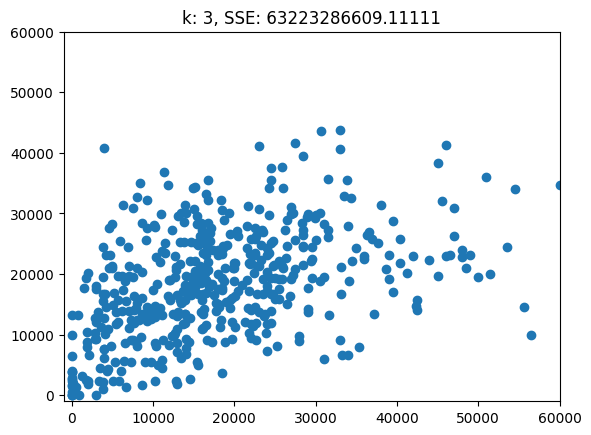

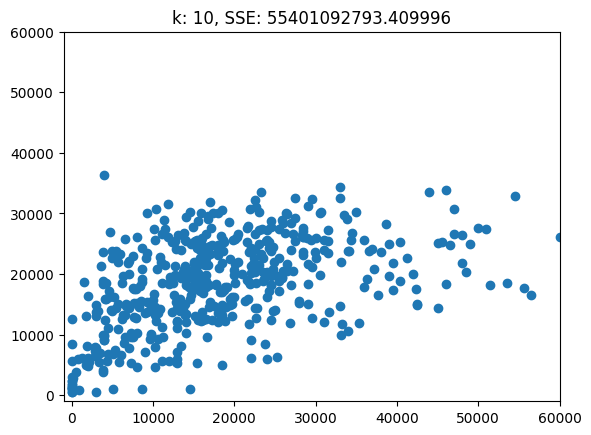

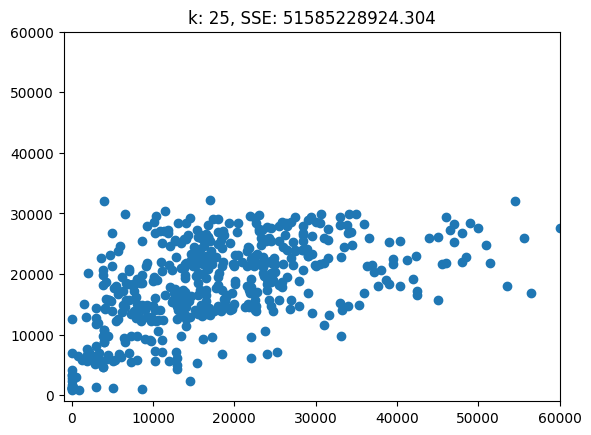

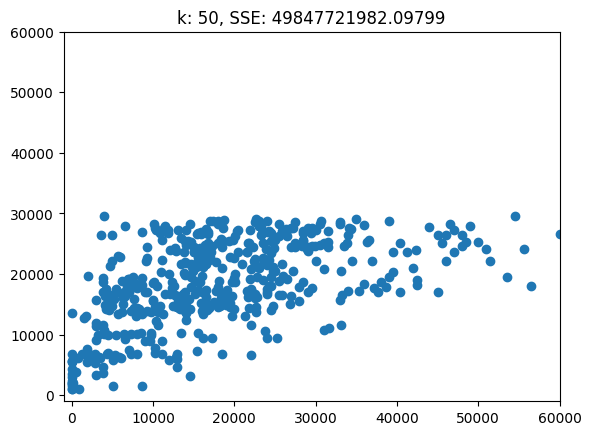

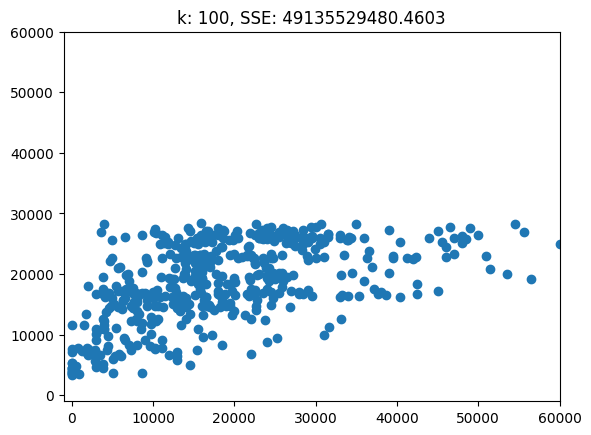

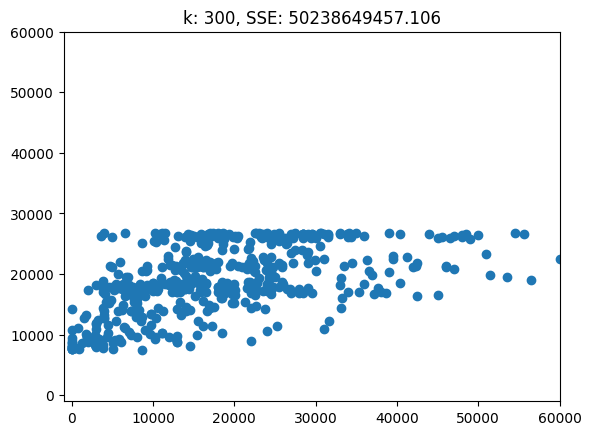

In [7]:
#4

for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set

    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title ('k: ' + str(k) + ', SSE: ' + str(SSE))

    axes.set_ylim(-1000, 60000)
    axes.set_xlim(-1000, 60000)
    plt.show()

#As the k value increases, the scatter plot of the predicted values flatten out


[77]


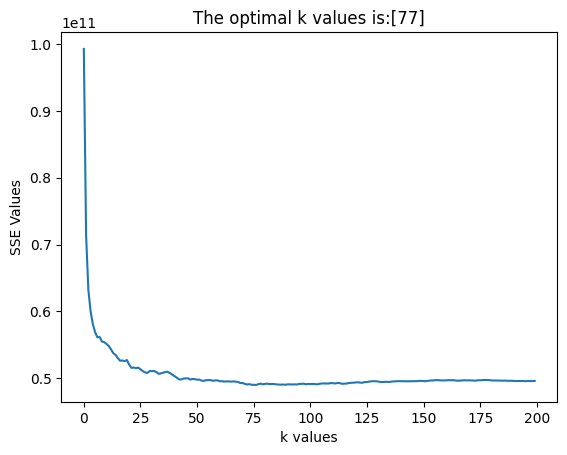

In [8]:
#Q1 #5
k_bar = 200 # Number of k's to try
k_grid=np.arange(1, k_bar)
SSE = np.zeros(k_bar) # We'll store the SSE here

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k; why index+1?
print(k_star)

plt.plot(np.arange(0, k_bar), SSE)
plt.xlabel('k values')
plt.ylabel('SSE Values')
plt.title('The optimal k values is:'+str(k_star))
plt.show()

#The optimal K value is 77 out of the range of k values 0 to 200

In [ ]:
#Q1 #6
#Given that the optimal k value is 77, when you use k values of 3, 10, and 25, the model is likely underfitting
#When you use the k value of 300, the model is probably overfitting
#The values of 50 and 100 have the best fit, given that they are around the optimal value of 77
#This is also represented in the SSE - the k values of 50 and 100 give the lowest SSE, supporting that this these values have the best fit compared to the others tested